In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df=pd.read_csv("warmup-datavidia/train.csv")
df_test=pd.read_csv("warmup-datavidia/test.csv")

In [164]:
df.isna().sum()

Unnamed: 0                                        0
Negara/Tahun                                      0
Emisi Savanna Api                                25
Emisi Kebakaran Hutan                            75
Emisi Residu Tanaman                           1118
Emisi Budidaya Padi                               0
Emisi Tanah Organik Yang Dikeringkan (Co2)        0
Emisi Pembuatan Pestisida                         0
Emisi Transportasi Makanan                        0
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi Ritel Makanan                               0
Emisi Penggunaan Listrik Di Pertanian             0
Emisi Kemasan Makanan                             0
Emisi Sistem Agrifood Pembuangan Limbah           0
Emisi Pengolahan Makanan                          0
Emisi Manufaktur Pupuk                            0
Emisi IPPU                                      599
Emisi Kotora

In [165]:
df= df.drop('Emisi Residu Tanaman', axis=1)
df_test= df_test.drop('Emisi Residu Tanaman', axis=1)

In [166]:
null_column=('Emisi Savanna Api','Emisi Kebakaran Hutan','Lahan Hutan','Konversi Hutan Bersih','Emisi Konsumsi Rumah Tangga Makanan','Emisi IPPU','Emisi Kotoran Diterapkan Pada Tanah','Emisi Manajemen Pupuk','Emisi Kebakaran Di Hutan Tropis Yang Lembab','Penggunaan Energi Di Pertanian')


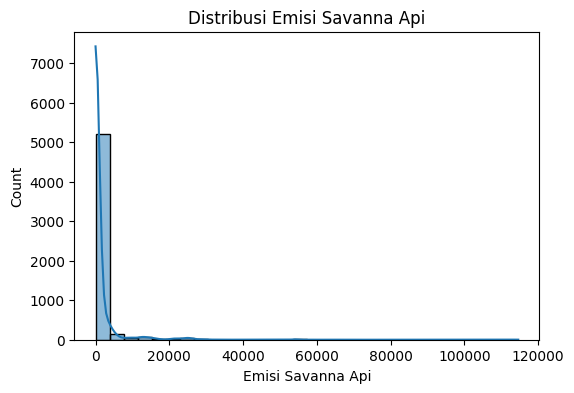

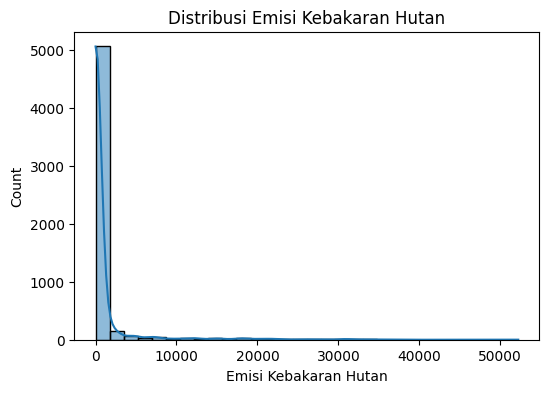

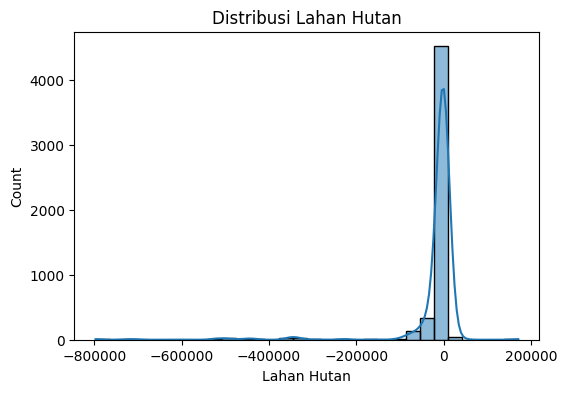

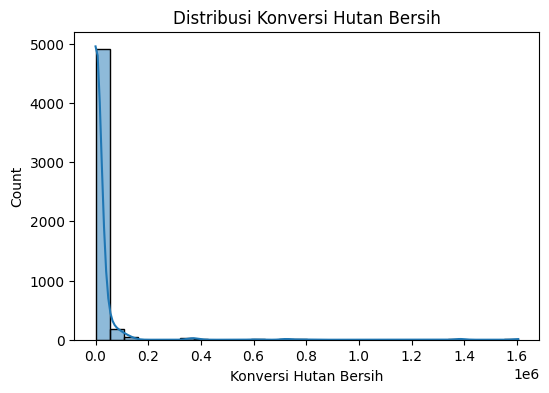

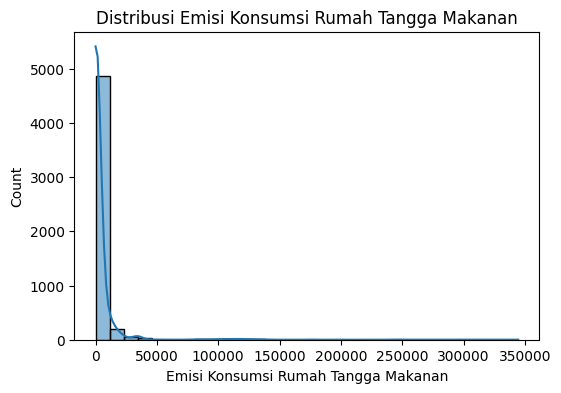

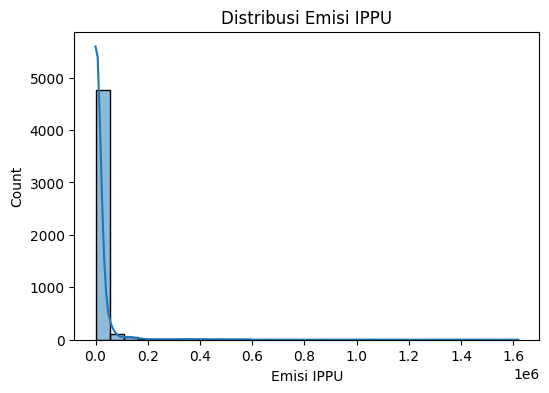

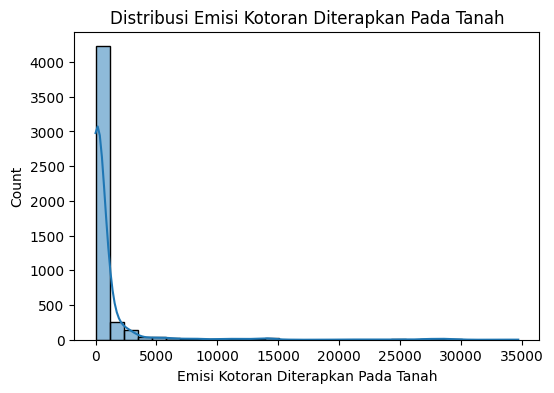

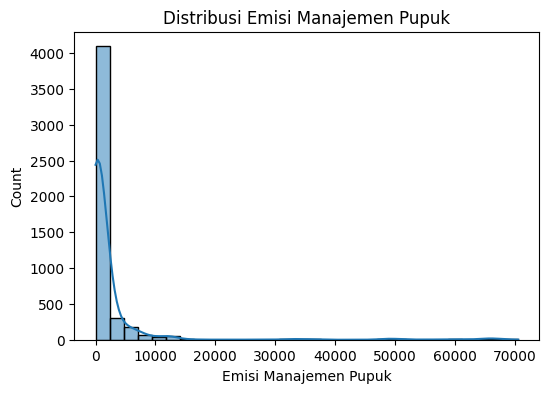

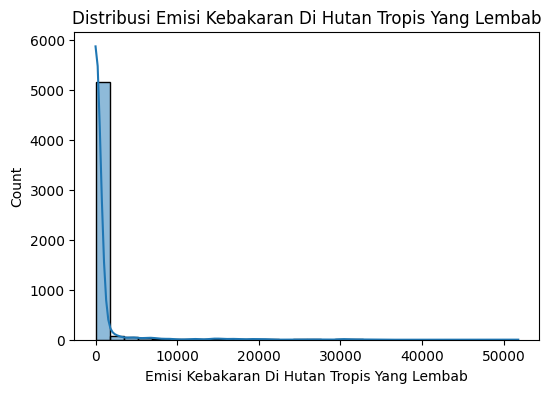

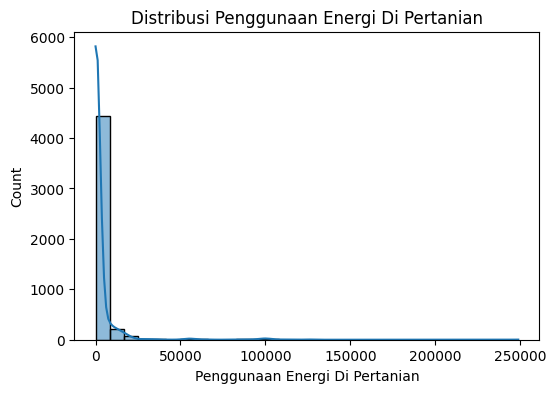

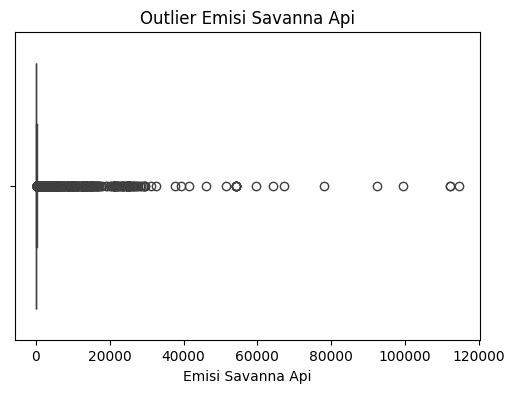

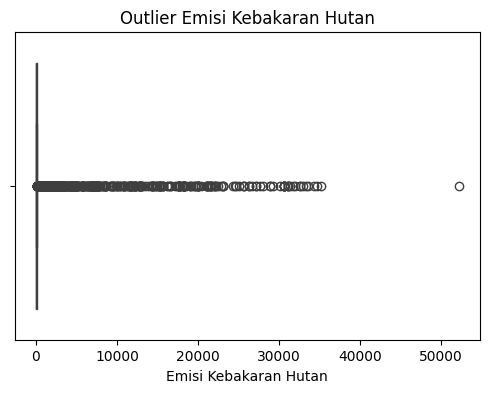

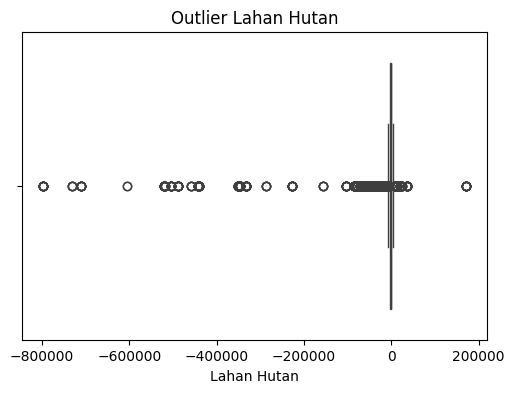

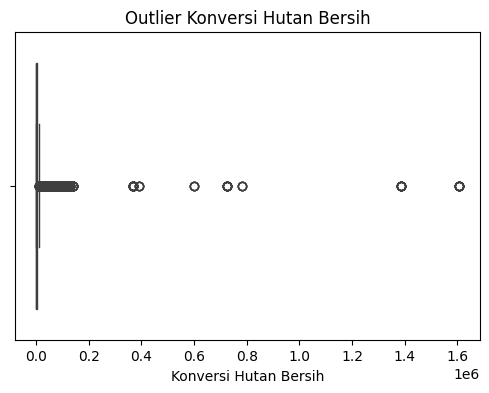

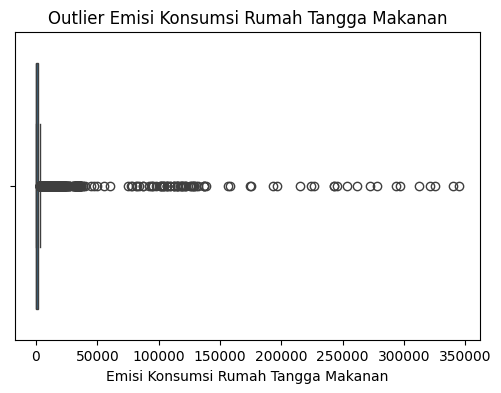

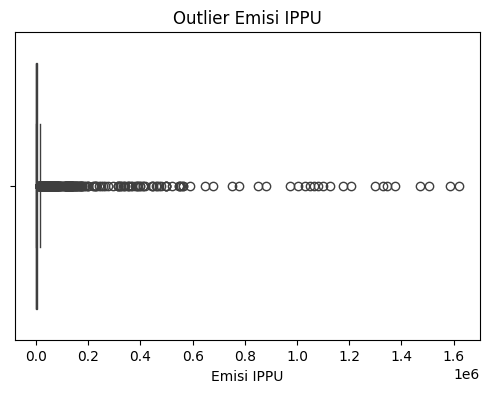

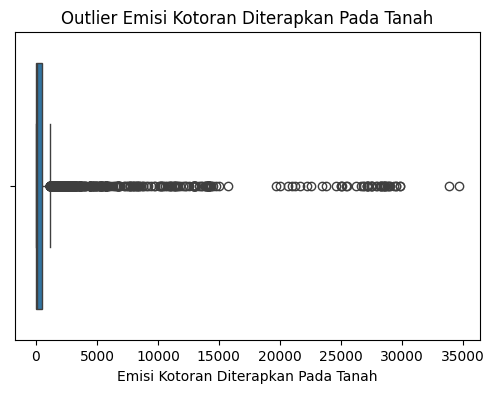

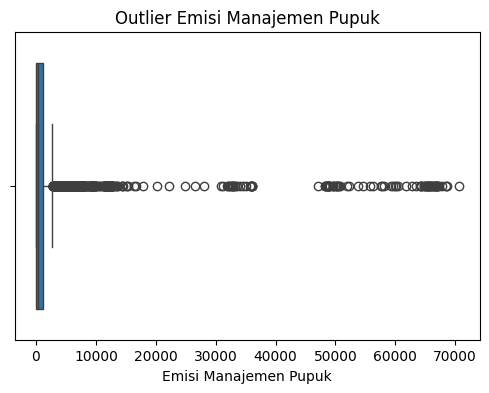

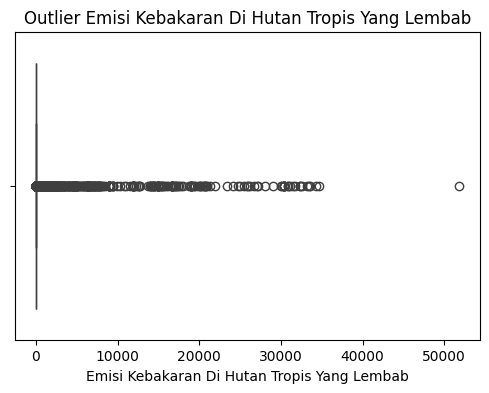

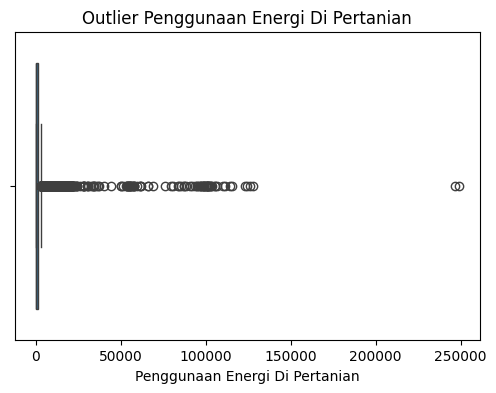

Mode dari Emisi Savanna Api: 0.0
Emisi Savanna Api
0.0000       1702
0.0106         21
0.0014         12
0.0001         10
0.0007          9
             ... 
2.2555          1
4.3577          1
0.4471          1
0.2479          1
1706.5216       1
Name: count, Length: 2919, dtype: int64 

Mode dari Emisi Kebakaran Hutan: 0.0
Emisi Kebakaran Hutan
0.0000      2187
0.1388        10
0.1389         8
0.1303         8
0.0557         6
            ... 
54.4068        1
57.4607        1
111.8669       1
32.3387        1
166.6056       1
Name: count, Length: 2364, dtype: int64 

Mode dari Lahan Hutan: 0.0
Lahan Hutan
 0.0000         1265
-350983.5047      22
-333.7277         21
-4.9610           21
-672.1000         21
                ... 
-10843.0573        2
-557.4606          1
-405.2210          1
-384.7150          1
-5183.7034         1
Name: count, Length: 471, dtype: int64 

Mode dari Konversi Hutan Bersih: 0.0
Konversi Hutan Bersih
0.0000        2198
5869.6000       25
59.8556      

In [167]:
for col in null_column:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# 2️⃣ Cek outlier dengan boxplot
for col in null_column:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier {col}')
    plt.show()

# 3️⃣ Cek modus untuk kategori (jika ada)
for col in null_column:
    print(f"Mode dari {col}: {df[col].mode()[0]}")
    print(df[col].value_counts(), "\n")

In [168]:
# Misal kolom awal bernama 'Negara_Tahun' dengan format "Indonesia_2020"
df[['Negara', 'Tahun']] = df['Negara/Tahun'].str.split('/', expand=True)

# Pastikan kolom Tahun dalam bentuk numerik
df['Tahun'] = pd.to_numeric(df['Tahun'], errors='coerce')

# Hapus kolom lama jika tidak diperlukan
df=df.drop(columns=['Negara/Tahun'], axis=1)
# Misal kolom awal bernama 'Negara_Tahun' dengan format "Indonesia_2020"
df_test[['Negara', 'Tahun']] = df_test['Negara/Tahun'].str.split('/', expand=True)

# Pastikan kolom Tahun dalam bentuk numerik
df_test['Tahun'] = pd.to_numeric(df_test['Tahun'], errors='coerce')

# Hapus kolom lama jika tidak diperlukan
df_test=df_test.drop(columns=['Negara/Tahun'], axis=1)

# Cek hasilnya
print(df.head())


   Unnamed: 0  Emisi Savanna Api  Emisi Kebakaran Hutan  Emisi Budidaya Padi  \
0           0            14.7237                 0.0557               686.00   
1           1            14.7237                 0.0557               678.16   
2           2            14.7237                 0.0557               686.00   
3           3            14.7237                 0.0557               686.00   
4           4            14.7237                 0.0557               705.60   

   Emisi Tanah Organik Yang Dikeringkan (Co2)  Emisi Pembuatan Pestisida  \
0                                         0.0                  11.807483   
1                                         0.0                  11.712073   
2                                         0.0                  11.712073   
3                                         0.0                  11.712073   
4                                         0.0                  11.712073   

   Emisi Transportasi Makanan  Lahan Hutan  Konversi Hutan Ber

In [169]:
# Cek tipe data setiap kolom
categorical_columns=['Negara','Tahun']

# Cek jumlah nilai unik di setiap kolom kategorikal
unique_counts_cat = df[categorical_columns].nunique()

# Tampilkan jumlah nilai unik dari kolom kategorikal
print("Jumlah nilai unik per kolom kategorikal:\n", unique_counts_cat)

# Tampilkan daftar nilai unik untuk setiap kolom kategorikal
for col in categorical_columns:
    print(f"\nKolom: {col}")
    print(df[col].unique())


Jumlah nilai unik per kolom kategorikal:
 Negara    236
Tahun      25
dtype: int64

Kolom: Negara
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Do

In [170]:
df=df.drop('Negara',axis=1)
df_test=df_test.drop('Negara',axis=1)

In [171]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur numerik dan target
X = df.drop('Peningkatan Suhu Rata - Rata ° C', axis=1)
y = df['Peningkatan Suhu Rata - Rata ° C']  # Ganti 'target' dengan nama kolom target sebenarnya

# Split data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [172]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Isi missing values
    ('scaler', StandardScaler()),  # Scaling agar semua fitur seimbang
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # Model ML
])

param_grid = {
    'model__n_estimators': [50, 100, 200],  # Jumlah pohon dalam RandomForest
    'model__max_depth': [None, 10, 20],  # Kedalaman pohon
    'model__min_samples_split': [2, 5, 10]  # Minimum sampel untuk split
}

# GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# # Jalankan GridSearchCV
# grid_search.fit(X_train, y_train)

# # Prediksi dengan model terbaik
# y_pred = grid_search.best_estimator_.predict(X_test)

# # Evaluasi
# print("Best parameters:", grid_search.best_params_)
# print("MAE:", mean_absolute_error(y_test, y_pred))

In [173]:
grid_search.fit(X, y)

# Prediksi dengan model terbaik
df_pred = grid_search.best_estimator_.predict(df_test)



In [174]:
# Pastikan ID dari df_test
if "Unnamed: 0" in df_test.columns:  
    df_test.rename(columns={"Unnamed: 0": "id"}, inplace=True)  

# Simpan hasil prediksi ke DataFrame
df_pred_df = pd.DataFrame({"id": df_test["id"], "Peningkatan Suhu Rata - Rata ° C": df_pred})

# Simpan ke CSV
df_pred_df.to_csv("hasil_prediksi_itb2025.csv", index=False)



In [175]:
# Ambil hasil tuning dari GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Konversi skor ke positif (karena MAE negatif dalam GridSearchCV)
results['mean_test_score'] = -results['mean_test_score']

# 🔹 Visualisasi: Heatmap untuk melihat performa parameter tuning
pivot_table = results.pivot(index='param_model__n_estimators', columns='param_model__max_depth', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".3f")
plt.xlabel("Max Depth")
plt.ylabel("N Estimators")
plt.title("GridSearchCV MAE Heatmap")
plt.show()

# 🔹 Visualisasi: Line plot hubungan estimators dengan MAE
plt.figure(figsize=(8, 5))
sns.lineplot(data=results, x="param_model__n_estimators", y="mean_test_score", marker="o")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Effect of n_estimators on MAE")
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# X_train = pd.DataFrame(pre_pipeline.fit_transform(X_train), columns=X_train.columns)

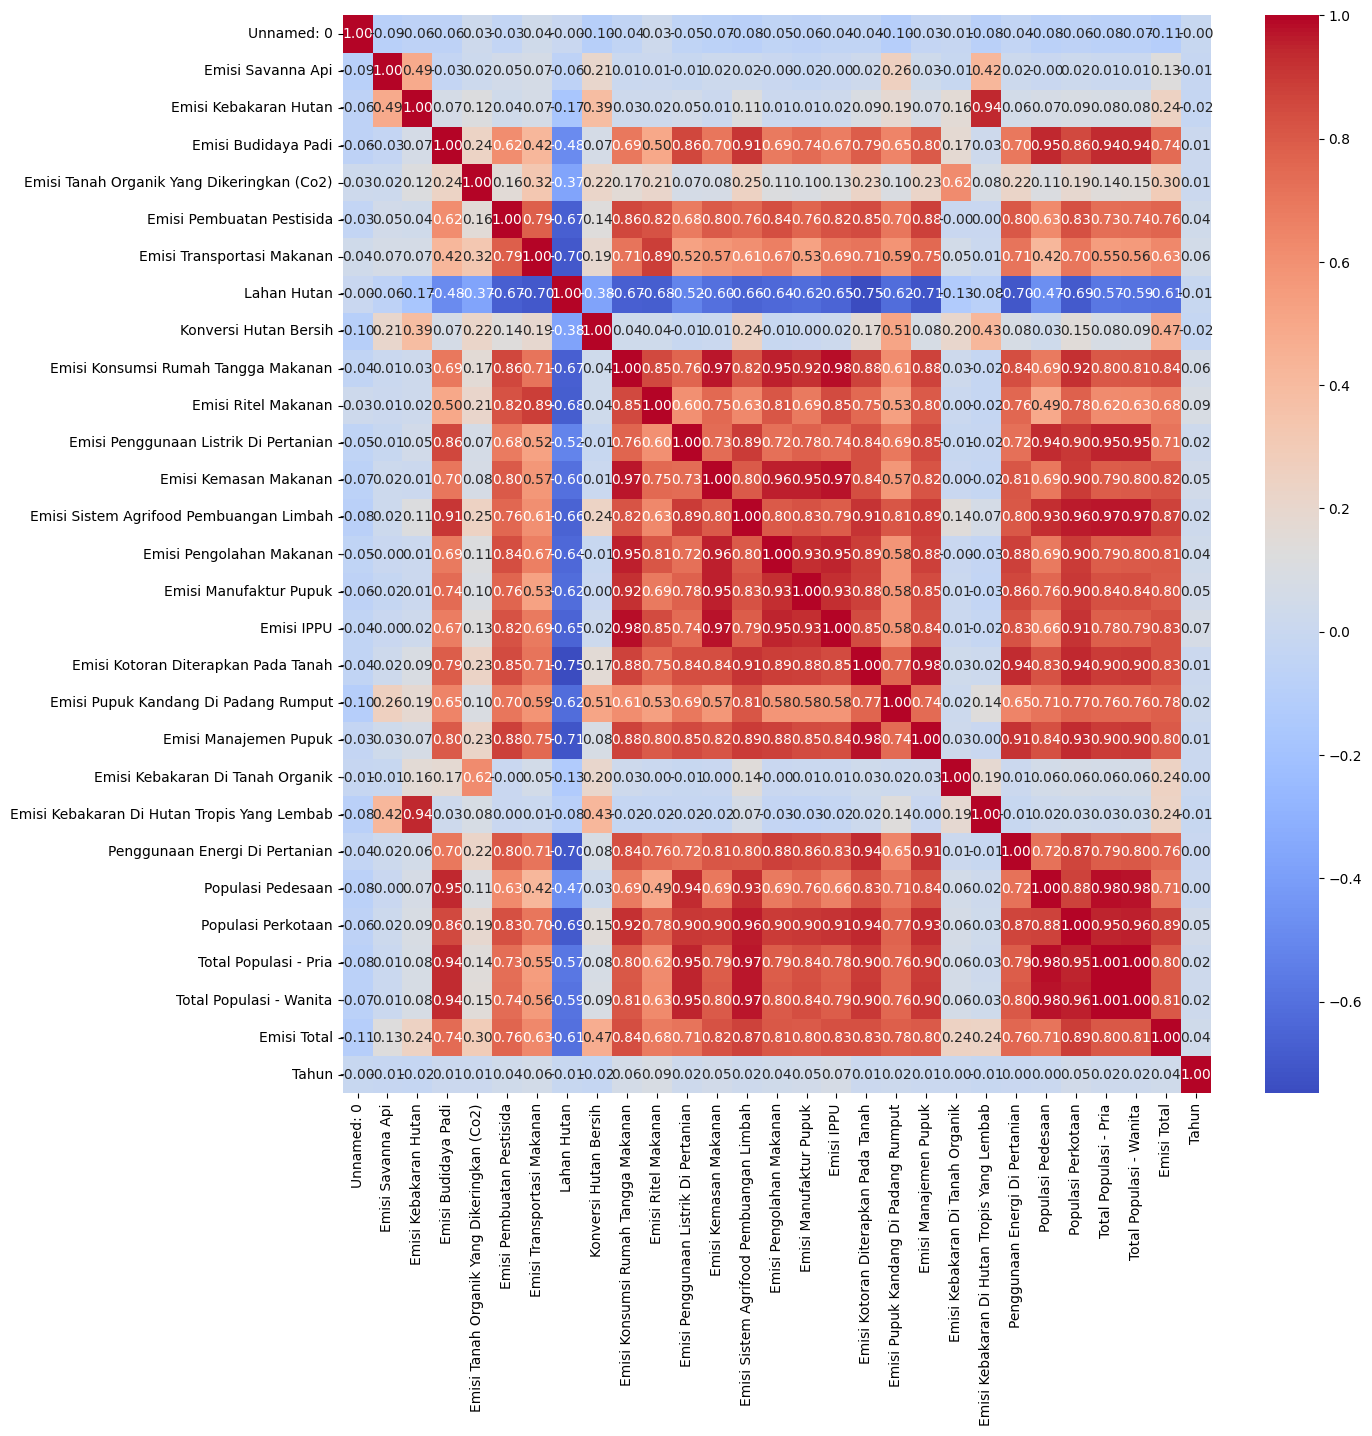

In [136]:
# import seaborn as sns

# plt.figure(figsize=(14, 14))
# sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.show()
